# Connecting the current Notebook to Google Drive and Mounting the Drive

In [1]:
from google.colab import drive  # Allows us to mount Google Drive to the Notebook
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Extracting the dataset from Google Drive to our current working directory

In [2]:
!unzip gdrive/My\ Drive/Handwritten_Characters_Dataset > /dev/null   # Unzipping and loading the dataset to the notebook

# Importing the required libraries

In [3]:
import matplotlib.pyplot as plt  # Used for plotting.
from keras.models import Sequential  # Sequential API is used to create models layer-by-layer. It adds a layer instance on top of the layers stack.
import pickle

# Importing the different layers that will be used to build the CNN
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical  # used to one-hot encode integer data.
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, model_from_json
from keras import backend as K
from keras import layers, models, optimizers, initializers, callbacks
from keras.models import load_model

import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image

import pandas as pd  # It is used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
import numpy as np  # Allows us to work with nd arrays, which are much faster than regular python lists
import os
from string import ascii_uppercase # Returns a string containing all the letters of the alphabet in uppercase, i.e A,B,C,...Z
from sklearn.model_selection import train_test_split  # Splits the dataset into two datasets, one for training the model and the other for testing it
from sklearn.utils import shuffle  # Performs a random shuffle on the dataset.

import cv2
import csv
import math

# Reading the dataset into a DataFrame

In [4]:
df = pd.read_csv("./A_Z Handwritten Data.csv")

In [5]:
df.shape

(372450, 785)

# Get a sample of the dataset

In [6]:
number_of_samples = 20000
df = df.sample(number_of_samples, replace=False)

# Exploring the dataset

In [7]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
344493,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215515,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218229,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284225,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14899,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.iloc[0, :].shape

(785,)

In [9]:
df['0'].max()

25

In [10]:
df.shape

(20000, 785)

From the results above, it can be seen that the DataFrame has 372450 samples (images). Each image is represented as a matrix of (1x784). The first column is the actual character i.e, the target.

# Splitting the DataFrame into features (X) and target (y)

In [11]:
X = df.drop('0',axis = 1)
y = df['0']

# Converting X and y into numpy arrays. Getting them into a format that is suitable for training and testing the model

In [12]:
X = np.array(X)
y = np.array(y)

# Reshaping X

We are reshaping X so that we can be able to display it as an image, as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

In [13]:
X = X.reshape(X.shape[0], 28, 28, 1)
y = y.reshape(y.shape[0], 1)

In [14]:
X.shape

(20000, 28, 28, 1)

In [15]:
y.shape

(20000, 1)

# Splitting the dataset into train and test dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Since the target variable is a Series of floating-point numbers in the range (0, 25) inclusive, we create a dictionary that maps each of the characters to the corresponding digit, For example, 0: A, 1: B, etc.

In [17]:
char_dict = dict(zip([i for i in range(26)], list(ascii_uppercase)))

In [18]:
char_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

# Visualizing the number of samples for each character

In [19]:
value_counts_dict = dict(pd.DataFrame(y).value_counts())

In [20]:
sorted_dict = dict(sorted(value_counts_dict.items(), key=lambda item: item[0]))

# Horizontal bar graph representing each character and the number of samples it has

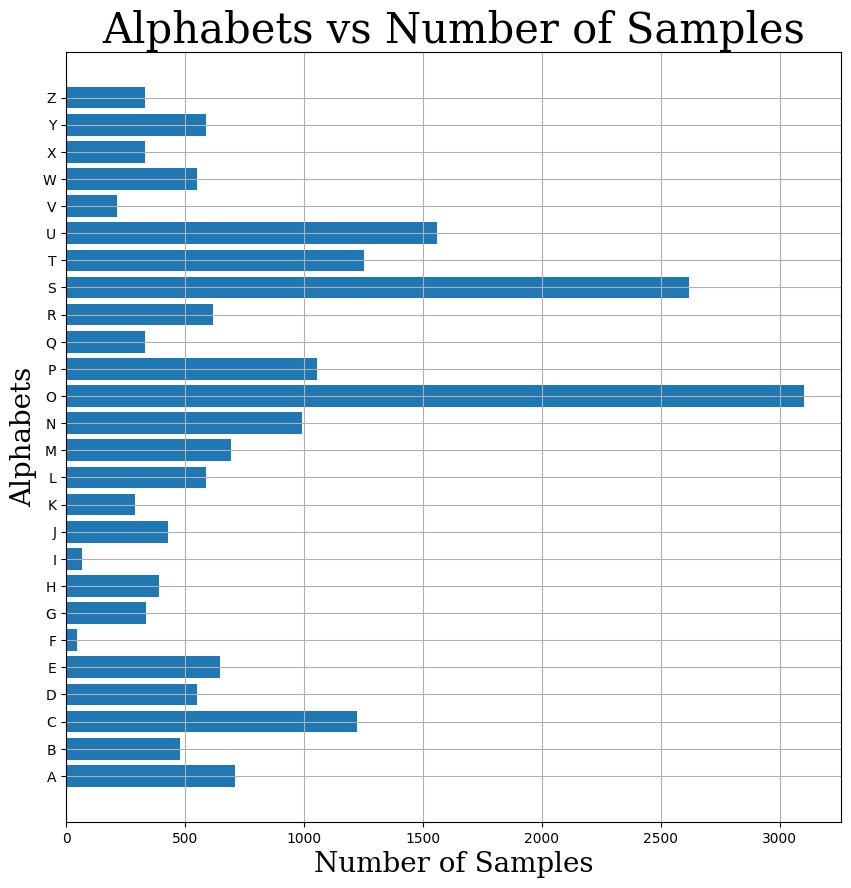

In [21]:
plt.figure(figsize=(10,10))
plt.barh(list(char_dict.values()), sorted_dict.values())
plt.xlabel("Number of Samples", fontdict={"fontsize": 20, "fontfamily": "serif"})
plt.ylabel("Alphabets", fontdict={"fontsize": 20, "fontfamily": "serif"})
plt.title("Alphabets vs Number of Samples", fontdict={"fontsize": 30, "fontfamily": "serif"})
plt.grid()
plt.show()

# Visualizing some random characters

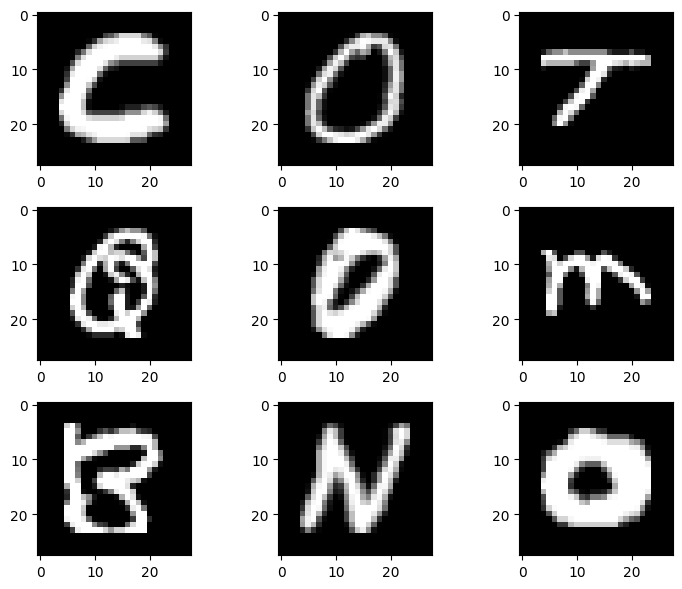

In [22]:
shuffled_images = shuffle(X_train.reshape(X_train.shape[0], 28, 28))[:100]

fig, ax = plt.subplots(3,3, figsize = (8, 6))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(shuffled_images[i], cmap='gray')
    plt.tight_layout()
plt.show()

# Converting the target (y) to one-hot encoded

In [23]:
y_train_cat = to_categorical(y_train, num_classes = 26, dtype='int')
y_test_cat = to_categorical(y_test, num_classes = 26, dtype='int')

In [24]:
y_train_cat[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

In [25]:
y_test_cat[:10]

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

# Creating the Model

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

# Defining utility variables for the CNN

In [27]:
cnn_n_epochs = 10
lr = 0.001
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# Compiling and fitting the model

In [28]:
model.compile(optimizer = Adam(learning_rate=lr), loss=loss, metrics=metrics)
fitted_model = model.fit(X_train, y_train_cat, epochs=cnn_n_epochs,  validation_data=(X_test, y_test_cat))

Epoch 1/10
500/500 [==============================] - 14s 7ms/step - loss: 1.0160 - accuracy: 0.7511 - val_loss: 0.3101 - val_accuracy: 0.9095
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2567 - accuracy: 0.9211 - val_loss: 0.2318 - val_accuracy: 0.9335
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1670 - accuracy: 0.9498 - val_loss: 0.2220 - val_accuracy: 0.9335
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1276 - accuracy: 0.9619 - val_loss: 0.1903 - val_accuracy: 0.9528
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1036 - accuracy: 0.9688 - val_loss: 0.2064 - val_accuracy: 0.9417
Epoch 6/10
500/500 [==============================] - 3s 7ms/step - loss: 0.0836 - accuracy: 0.9744 - val_loss: 0.2293 - val_accuracy: 0.9377
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0814 - accuracy: 0.9741 - val_loss: 0.1631 - val_accuracy: 0.9572
Epoch

# Saving the model

In [29]:
save_dir = "gdrive/MyDrive/Handwritten_Characters_Prediction_Models"

In [30]:
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
  # !mkdir gdrive/MyDrive/Handwritten_Characters_Prediction_Models

In [31]:
model.summary()
model.save(os.path.join(save_dir, 'model_hand.h5'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [32]:
# !cp model_hand.h5 gdrive/MyDrive/Handwritten_Characters_Prediction_Models

# Loading the model from the history object

In [33]:
base_model = model
base_model.load_weights(filepath=os.path.join(save_dir, 'model_hand.h5'))

# Utility function to plot accuracy and loss plots

In [34]:
def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(25, 10))
    plt.subplot(121)
    plt.xlim(0,epochs)
    plt.ylim(0, 1.05)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0,epochs)
    plt.ylim(0, 1.4)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the accuracy and loss curves of the cnn model

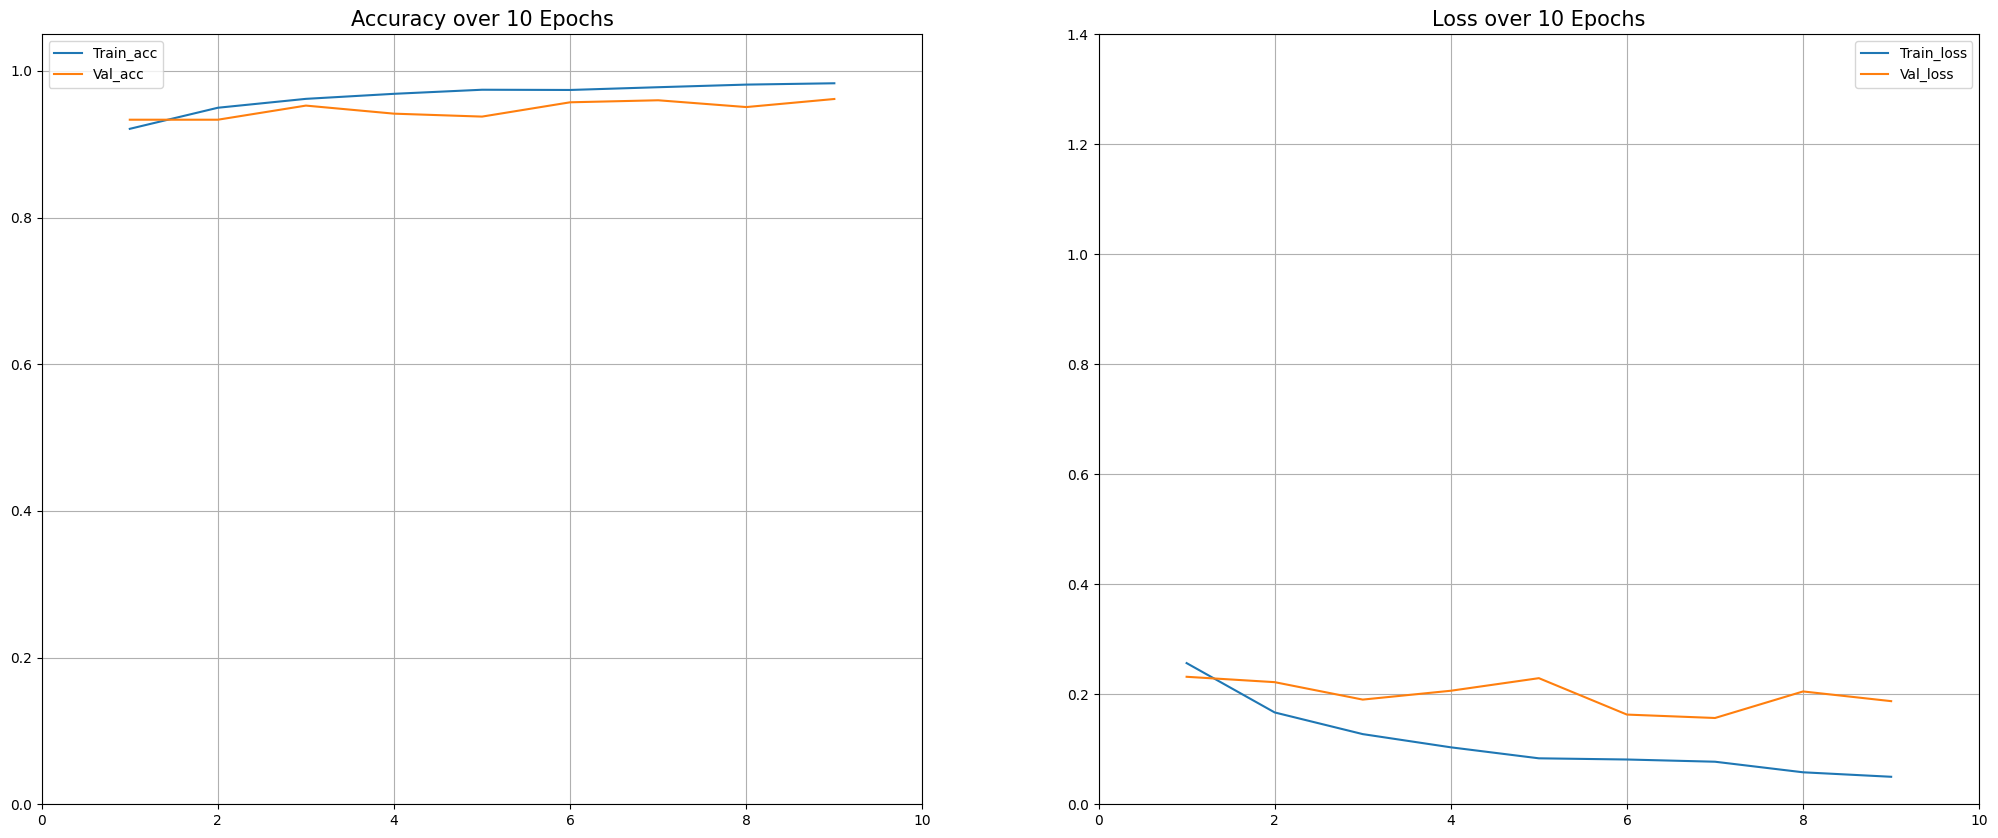

In [35]:
plot_acc_loss(fitted_model, cnn_n_epochs)

# Fine tuning after unfreezing layers and saving the history object

In [36]:
base_model = model
base_model.load_weights(filepath="gdrive/MyDrive/Handwritten_Characters_Prediction_Models/model_hand.h5")
base_model.trainable = True
#unfreeze every layer except batchnorm
for layer in base_model.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = False
    # print(layer.trainable)
    # print(layer)
#for finetuning we use much lower learning rate.
optimizers = Adam(learning_rate=0.00001)
base_model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
base_model.save("gdrive/MyDrive/Handwritten_Characters_Prediction_Models/model_hand_fine_tuned.h5")
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [37]:
fine_tuned_model = base_model.fit(X_train, y_train_cat, epochs=cnn_n_epochs,  validation_data=(X_test, y_test_cat))

Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.1657 - val_accuracy: 0.9660
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.1587 - val_accuracy: 0.9680
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 0.1554 - val_accuracy: 0.9690
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.1537 - val_accuracy: 0.9697
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.1528 - val_accuracy: 0.9700
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.1533 - val_accuracy: 0.9707
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.1532 - val_accuracy: 0.9710
Epoch 

# Plotting the accuracy and loss curves of the fine_tuned_cnn

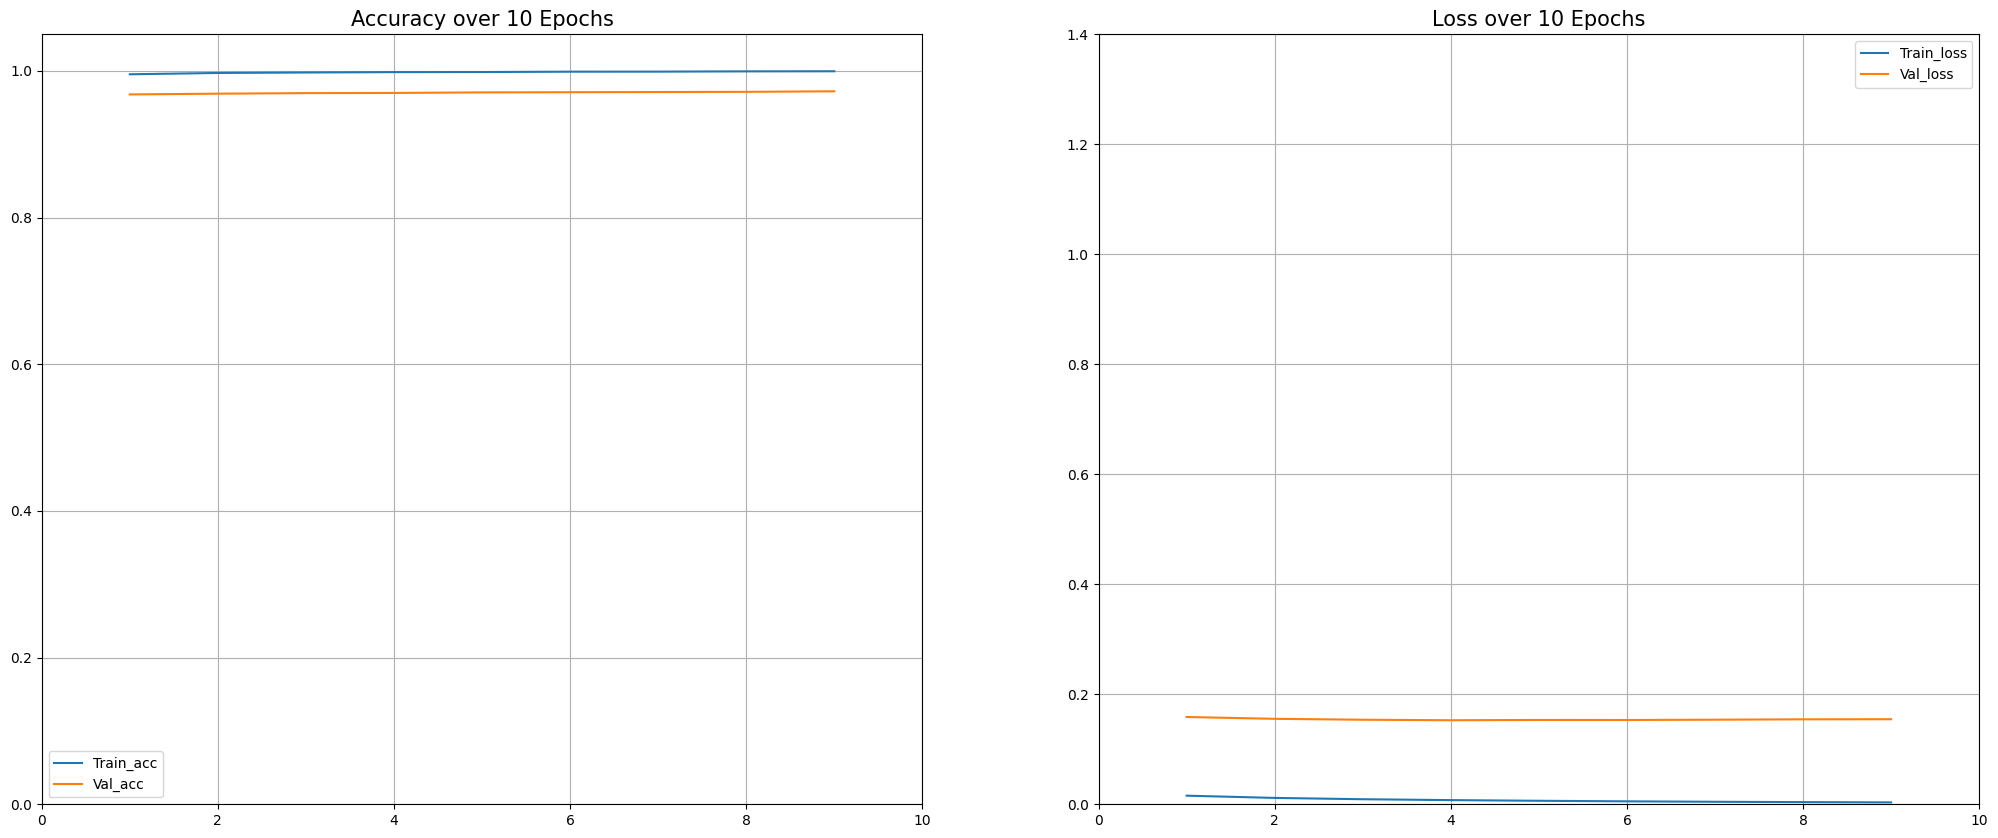

In [38]:
plot_acc_loss(fine_tuned_model, cnn_n_epochs)

# Testing the model

In [39]:
final_cnn = base_model
final_cnn.load_weights("gdrive/MyDrive/Handwritten_Characters_Prediction_Models/model_hand_fine_tuned.h5")

predicted_labels = final_cnn.predict(X_test)

actual_y_test = [np.argmax(y, axis=None, out=None) for y in y_test_cat]
predicted_y_test = np.argmax(predicted_labels, axis=1)
accuracy = len(np.where(actual_y_test == predicted_y_test)[0]) / len(actual_y_test)
print(f"The accuracy of the model is: {accuracy*100}")

125/125 [==============================] - 0s 2ms/step
The accuracy of the model is: 96.175


# Saving and Loading the final model

In [40]:
final_cnn.save("gdrive/MyDrive/Handwritten_Characters_Prediction_Models/fine_tuned_cnn.h5")

In [41]:
loaded = load_model("gdrive/MyDrive/Handwritten_Characters_Prediction_Models/fine_tuned_cnn.h5")

In [42]:
loaded.predict(X_test)

125/125 [==============================] - 0s 2ms/step


array([[3.05060059e-15, 4.68177146e-13, 9.99997258e-01, ...,
        1.49538680e-11, 8.90154825e-11, 3.11161263e-10],
       [6.10213040e-18, 8.37283801e-14, 2.75330685e-14, ...,
        9.78971564e-18, 1.34389800e-11, 1.39227702e-22],
       [1.11053666e-10, 3.68566733e-09, 7.15648341e-08, ...,
        8.30207167e-17, 1.41791158e-12, 9.26334530e-13],
       ...,
       [7.66829089e-06, 1.34586355e-06, 1.57163571e-09, ...,
        1.68743899e-08, 2.54661586e-06, 5.72923683e-15],
       [1.65955444e-11, 9.48724543e-10, 3.05374524e-05, ...,
        3.67011543e-12, 4.66456278e-08, 2.55443999e-11],
       [4.52240068e-09, 9.94218111e-11, 5.87840141e-08, ...,
        6.23627042e-04, 9.99278367e-01, 1.91614067e-08]], dtype=float32)

In [43]:
!ls gdrive/MyDrive/Sample\ Characters

capA.jpg  capB.jpg


# Making Predictions on sample images

In [44]:
sample_img_path = "gdrive/MyDrive/Sample Characters/capA.jpg"

In [45]:
def preprocess_img(img_path, threshold=120):
  # Load the image
  img = cv2.imread(img_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Resize the image to 28x28 pixels
  resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

  # Invert the colors
  inverted = cv2.bitwise_not(resized)

  # Removing Noise
  inverted[inverted <= threshold] = 0

  # Drawing the image
  # plt.imshow(inverted, cmap='gray')
  # plt.show()

  # Reshaping the array to fit the model architecture
  img_arr = inverted.reshape(1, 28, 28, 1)

  # Returning the image array
  return img_arr


In [46]:
img_arr = preprocess_img(sample_img_path)

In [47]:
print(f"The predicted character is: {char_dict[final_cnn.predict(img_arr).argmax()]}")

1/1 [==============================] - 0s 191ms/step
The predicted character is: A
